# Multi-Thresholding

分段阈值法（Piecewise Thresholding）：</br>使用多个阈值将图像分成多个区间，每个区间对应不同的灰度值或标签

Otsu’s 多阈值法（Otsu’s Multi-level Thresholding）：</br>扩展 Otsu’s 方法来选择多个最佳阈值，用于最大化类间方差。适用于具有多个峰值的直方图

聚类方法（Clustering Methods）：</br>使用 K-means 聚类等算法，将像素值分为多个类别，每个类别对应一个阈值


In [4]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import config as config

## Create Output Folder

In [5]:
path = 'img_grays/outputhreshold_value02'

if not os.path.exists(path):
    os.makedirs(path)
    print(f'路径 {path} 已创建')
else:
    print(f'路径 {path} 已存在')

路径 img_grays/outputhreshold_value02 已存在


## Import Images

Shape of the color img_gray:  (200, 200, 3)
Shape of the grayscale img_gray:  (200, 200)
Data type of the img_gray:  uint8


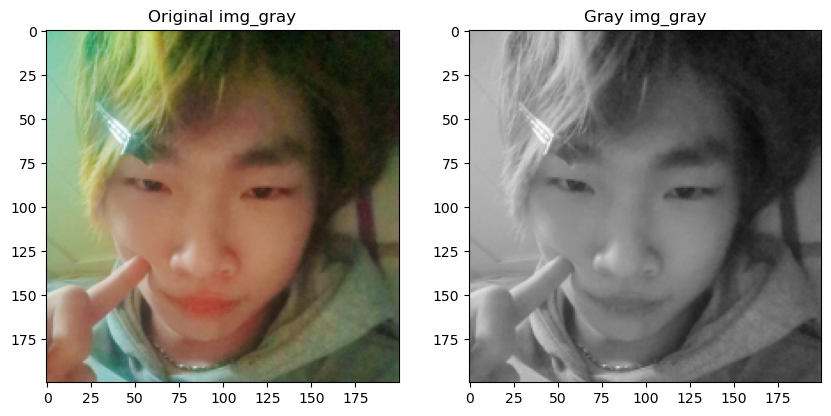

In [7]:
# 导入图像
img_bgr = cv.imread(filename=config.TEST_IMAGE, flags=cv.IMREAD_COLOR)
# img_gray = cv.imread(filename=config.TEST_img_gray, flags=cv.IMREAD_GRAYSCALE)
img_gray = cv.cvtColor(src=img_bgr, code=cv.COLOR_BGR2GRAY)

# output img_gray info
print("Shape of the color img_gray: ", img_bgr.shape)
print("Shape of the grayscale img_gray: ", img_gray.shape)
print("Data type of the img_gray: ", img_bgr.dtype)


# 显示图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)), plt.title('Original img_gray')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)), plt.title('Gray img_gray')
plt.show()

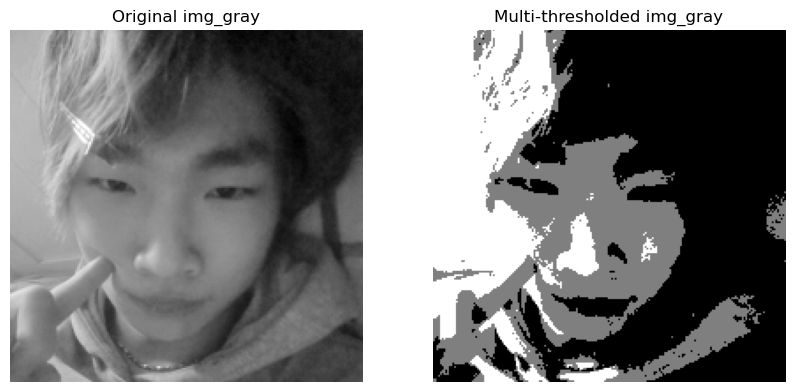

In [27]:
# set threshold value
threshold_value01 = 111
threshold_value02 = 144

# Create a binary image
output_img = np.zeros_like(img_gray)

# 应用多个阈值
output_img[(img_gray >= 0) & (img_gray <= threshold_value01)] = 0
output_img[(img_gray > threshold_value01) & (img_gray <= threshold_value02)] = 127
output_img[(img_gray > threshold_value02)] = 255

# 显示结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original img_gray")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Multi-thresholded img_gray")
plt.imshow(output_img, cmap="gray")
plt.axis("off")

plt.show()